## Exploring larval _Drosophila_ anemotaxis behavioural data
Written by Sharbat based on Timothee, with help from GitHub Copilot, 2025

In [33]:
import pandas as pd
import os
import re
from matplotlib import cm 
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np
import itertools
import src.parse_data as anm_parse
import src.plot_data as anm_plot
import json
plt.style.use('../anemotaxis.mplstyle')

In [34]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
data_folder = "/mnt/c/Users/schatterjee/Documents/anemotaxis/data/20210803_112230/"
larvae_data = anm_parse.extract_all_larvae(data_folder)

In [36]:
# Example: Accessing metadata, data, and summary for larva "20.00001"
print(json.dumps(larvae["20.00001"]["metadata"], indent=4))  # Experiment details
# print(json.dumps(larvae["20.00001"]["data"] , indent=4))     # Extracted raw data
print(json.dumps(larvae["20.00001"]["summary"], indent=4))   # Summary statistics


{
    "date": "20210803_112230",
    "genotype": "CSMH",
    "effector": "CSMH",
    "tracker": "t7",
    "stimulus_type": "p",
    "stimulus_specifications": "5gradient2",
    "prestimulus_duration": "2s",
    "number_of_repetitions": 1,
    "stimulus_duration": "600s",
    "interval_between_repetitions": "0s",
    "raw_protocol": "p_5gradient2_2s1x600s0s#n#n#n"
}
{
    "time": {
        "size": 258,
        "mean": 4.454015503875969,
        "max": 10.617,
        "min": 0.008
    },
    "speed": {
        "size": 258,
        "mean": 0.5283837209302324,
        "max": 1.535,
        "min": 0.0
    },
    "length": {
        "size": 258,
        "mean": 3.593670542635659,
        "max": 5.45,
        "min": 2.404
    },
    "curvature": {
        "size": 258,
        "mean": 23.651937984496126,
        "max": 100.9,
        "min": 3.8
    }
}


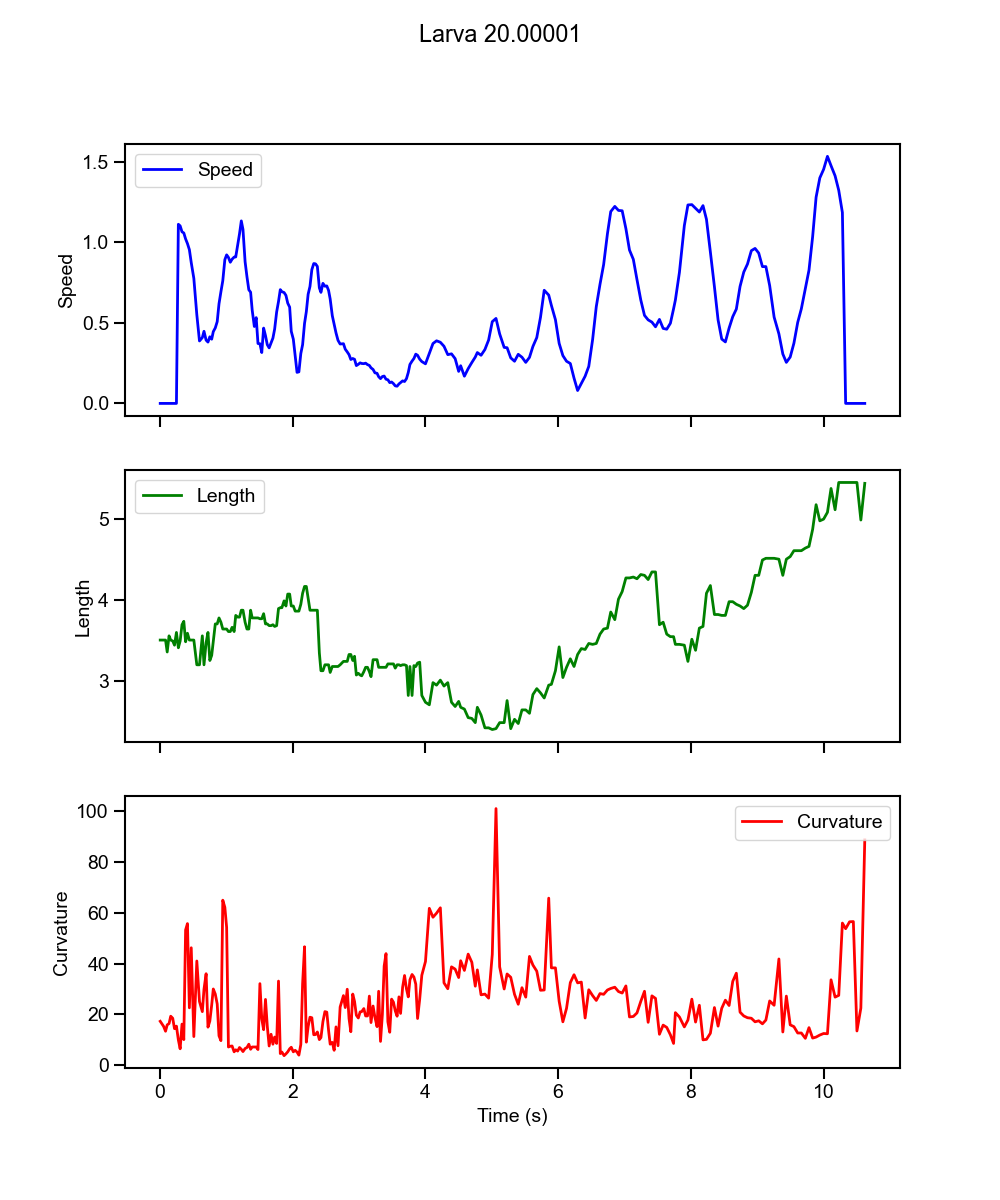

In [37]:
larva_id = '20.00001'
anm_plot.plot_larva_data(larvae_data[larva_id]['data'], larva_id)

In [38]:
with open('../results/summary_statistics.json', 'w') as f:
    json.dump({larva_id: data['summary'] for larva_id, data in larvae_data.items()}, f, indent=4)

In [39]:

larvae_data = anm_parse.compute_v_and_axis(larvae_data)
ni_x, ni_y = anm_parse.compute_navigational_index(larvae_data)
print(f"Navigational Index X: {ni_x}, Navigational Index Y: {ni_y}")

Navigational Index X: 288.2776294886225, Navigational Index Y: 288.2776294886225
